###   Analýza populárních filmů za posledních 40 let
----------------------------------------------------------

#### Pavel Furch, učo: 415339
#### ESF MUNI, Datová analýza v R 2, jarní semestr 2023
----------------------------------------------------------
Účelem této analýzy je demonstrace možností filtrování (dplyr, tidyverse) 
a vytváření grafů (ggplot2, highcharter) na datovém souboru obsahujícím informace 
o filmech vydaných v posledních čtyřiceti letech.

Cílem je získat přehled souvislostech v datovém souboru.
Výzkumné otázky:

    - Jaké faktory mají největší vliv na výši tržeb filmu?
    - Jak vypadá srovnání popularity žánrů?
    - Které země (krom USA) se nejvíce podílí na tvorbě filmů?
    - V jakých měsících vychází nejvíce filmů?
    - Která studia generují nejvíce tržeb?
    - Liší se žánry podle délky filmu?
    - Ve kterých měsících generují filmy nejvyšší tržby?
    - Jaké filmy mají nejvyšší tržby?
    
Otázky budou zodpovídány u jednotlivých grafů.

V datovém souboru je celkem 7668 filmů natočených v rozmezí let 1980 až 2020. 

K jednotlivým filmům jsou k dispozici následující informace:

    'nazev': Název filmu
    'hodnoceni': Hodnocení filmu pomocí věkové známky (R, PG, PG-18)
    'zanr': Žánr filmu
    'rok': Rok vydání filmu
    'datum_vydani': Datum vydání filmu ve formátu: "Měsíc den, Rok (Stát)" (později z něj vyjmeme měsíce)
    'skore': Skóre filmu, respektive divácká oblíbenost na škále od 0 až 10
    'hlasy': Počet hlasů, které udělily skóre
    'reziroval': Režisér filmu
    'scenar': Scenárista filmu
    'hlavni_herec': Hlavní herec/herečka filmu
    'zeme': Hlavní země původu
    'rozpocet': Rozpočet filmu v miliardách USD
    'trzby': Tržby filmu v miliardách USD
    'studio': Název filmového, které film produkovalo
    'delka': Délka filmu v minutách

Licence pro využití souboru je následující:

CC0 1.0 Universal (CC0 1.0)
Public Domain Dedication 

Datový soubor je tedy bez copyrightu a volně k dispozici.

Zdroj datového souboru zde:
https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download
Pozn. Délka a rozsah let v popisu datového souboru na Kaggle nesouhlasí se skutečným obsahem. 
Proto jsem výše uvedl jen skutečnou délku.

In [199]:
# Nahrajeme datový soubor do prostředí R
library(readr)
f <- read_csv("movies.csv")

# Zobrazení načtených dat
head(f,3)

Rows: 7668 Columns: 15
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (9): name, rating, genre, released, director, writer, star, country, com...
dbl (6): year, score, votes, budget, gross, runtime

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.9e+07,46998772,Warner Bros.,146
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5e+06,58853106,Columbia Pictures,104
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.8e+07,538375067,Lucasfilm,124


In [218]:
# Třída datového souboru

class(f)

[1] "tbl_df"     "tbl"        "data.frame"

In [10]:
# Původní anglické názvy

colnames(f)

[1] "name"     "rating"   "genre"    "year"     "released" "score"   
 [7] "votes"    "director" "writer"   "star"     "country"  "budget"  
[13] "gross"    "company"  "runtime"

In [200]:
# Pro snadnější práci s datasetem si sloupce přejmenujeme

names(f) <- c('nazev', 'hodnoceni', 'zanr', 'rok', 'datum_vydani', 
              'skore', 'hlasy', 'reziroval', 'scenar', 'hlavni_herec', 
              'zeme', 'rozpocet', 'trzby', 'studio', 'delka')
colnames(f)

[1] "nazev"        "hodnoceni"    "zanr"         "rok"          "datum_vydani"
 [6] "skore"        "hlasy"        "reziroval"    "scenar"       "hlavni_herec"
[11] "zeme"         "rozpocet"     "trzby"        "studio"       "delka"

In [201]:
# Ve kterých sloupcích vyskytují chybějící hodnoty?

as.matrix(colSums(is.na(f)))

dim(f)

nazev,0
hodnoceni,77
zanr,0
rok,0
datum_vydani,2
skore,3
hlasy,3
reziroval,0
scenar,3
hlavni_herec,1
zeme,3


[1] 7668   15

In [ ]:
Výše vidíme, že významná část záznamů (2171) neobsahuje položku rozpočet. 
Protože jde o klíčovou proměnnou ve více výzkumných otázkách, 
rozhodl jsem se pracovat bez těchto hodnot.

In [202]:
# Očištení od nulových hodnot a kontrola dimenzí

f <- na.omit(f)
dim(f)

[1] 5421   15

In [203]:
# Podrobnější přehled o datovém souboru

summary(f)

    nazev            hodnoceni             zanr                rok      
 Length:5421        Length:5421        Length:5421        Min.   :1980  
 Class :character   Class :character   Class :character   1st Qu.:1993  
 Mode  :character   Mode  :character   Mode  :character   Median :2002  
                                                          Mean   :2002  
                                                          3rd Qu.:2011  
                                                          Max.   :2020  
 datum_vydani           skore           hlasy          reziroval        
 Length:5421        Min.   :1.900   Min.   :    195   Length:5421       
 Class :character   1st Qu.:5.800   1st Qu.:  19000   Class :character  
 Mode  :character   Median :6.500   Median :  52000   Mode  :character  
                    Mean   :6.392   Mean   : 115066                     
                    3rd Qu.:7.100   3rd Qu.: 129000                     
                    Max.   :9.300   Max.   :2400000

Vidíme, že tržby jsou uvedeny pomocí vědecké notace, bude třeba je překonvertovat na jednotky miliard USD.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


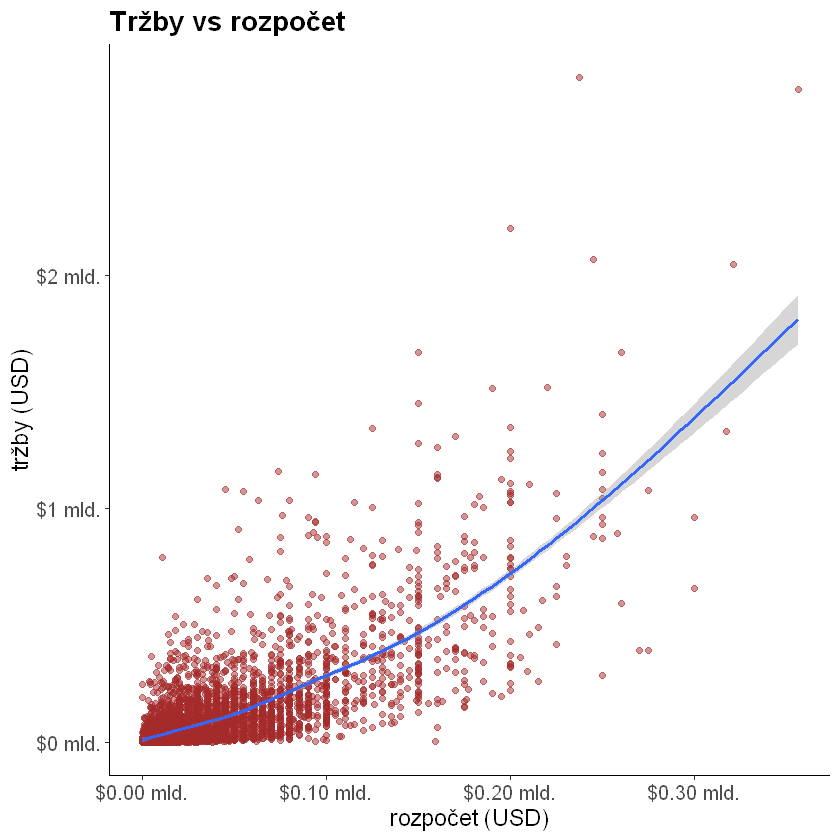

In [205]:
# jaký je vztah mezi tržbami a rozpočtem?

library(ggplot2)
library(scales)

ggplot(f, aes(x = rozpocet, y = trzby)) +
  geom_point(color = "brown", alpha = 0.5) +
  geom_smooth() +
  labs(title = "Tržby vs rozpočet", x = "rozpočet (USD)", y = "tržby (USD)") +
  scale_x_continuous(labels = scales::dollar_format(suffix = " mld.", scale = 1e-9)) +
  scale_y_continuous(labels = scales::dollar_format(suffix = " mld.", scale = 1e-9)) +
  theme_classic() +
  theme(plot.title = element_text(size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.position = "none")

In [ ]:
S rozpočtem konstatně rostou tržby. Filmů které vydělaly více než miliardu USD je však minimum. 
Vidíme, že většina filmů se z rozpočtem vlezla do 100 milionů USD. 

In [207]:
#  Top 10 nejlépe hodnocených režisérů

library(dplyr)

nejlepsi_reziseri <- f %>%
  group_by(reziroval) %>%
  summarise(prumerny_rating_filmu = mean(skore, na.rm = TRUE)) %>%
  arrange(desc(prumerny_rating_filmu)) %>%
  head(10)

nejlepsi_reziseri

reziroval,prumerny_rating_filmu
<chr>,<dbl>
Roberto Benigni,8.60
Tony Kaye,8.50
Bob Persichetti,8.40
Nadine Labaki,8.40
Sergio Leone,8.40
Stanley Kubrick,8.35
Giuseppe Tornatore,8.30
Lee Unkrich,8.30
Majid Majidi,8.30


In [ ]:
Stanley Kubricka jsem v tomto seznamů předpokládal, avšak přiznám se, 
že s výjimkou Sergia Leoneho jsou mi ostatní top tvůrci neznámí.

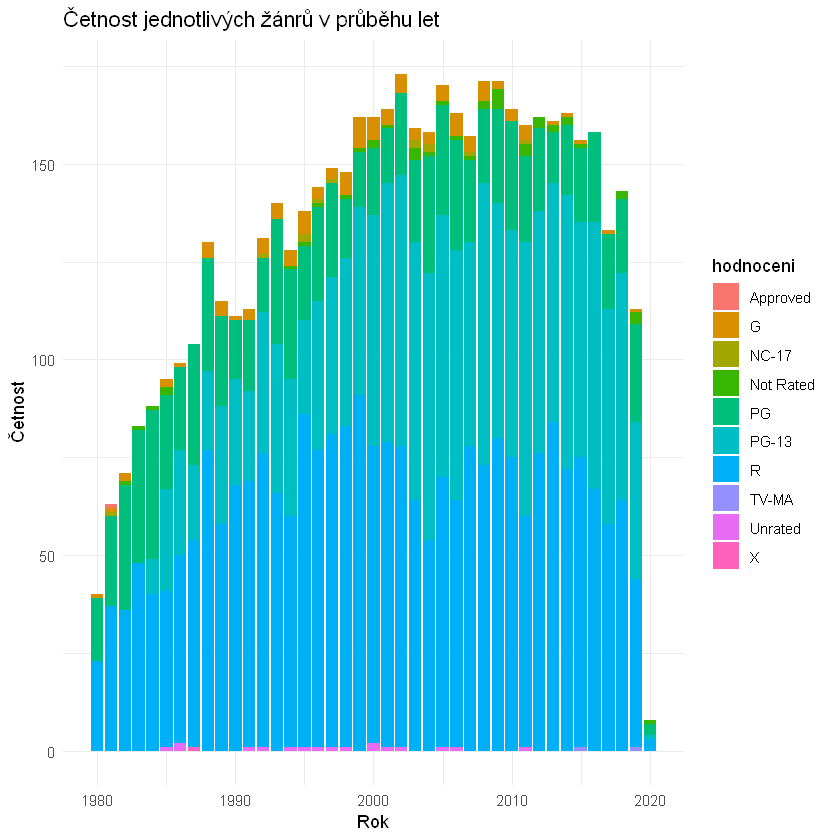

In [208]:
# Jak se lišilo značení filmů v průběhu let dle jejich vhodnoti pro věkové skupiny diváků?

ggplot(f, aes(x = rok, fill = hodnoceni)) +
  geom_bar() +
  labs(title = "Četnost jednotlivých žánrů v průběhu let", x = "Rok", y = "Četnost") +
  theme_minimal() +
  theme(legend.position = "right")

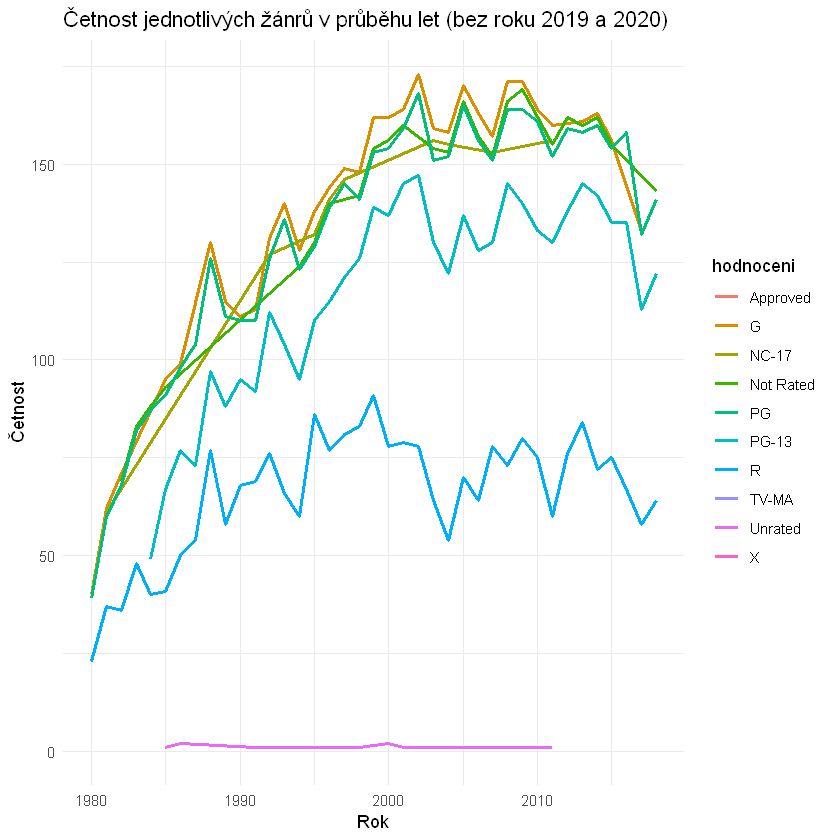

In [62]:
ggplot(f %>% filter(!rok %in% c(2019, 2020)), aes(x = rok, color = hodnoceni)) +
  stat_count(aes(y = ..count..), geom = "line", size = 1) +
  labs(title = "Četnost jednotlivých žánrů v průběhu let (bez roku 2019 a 2020)", x = "Rok", y = "Četnost") +
  theme_minimal() +
  theme(legend.position = "right")

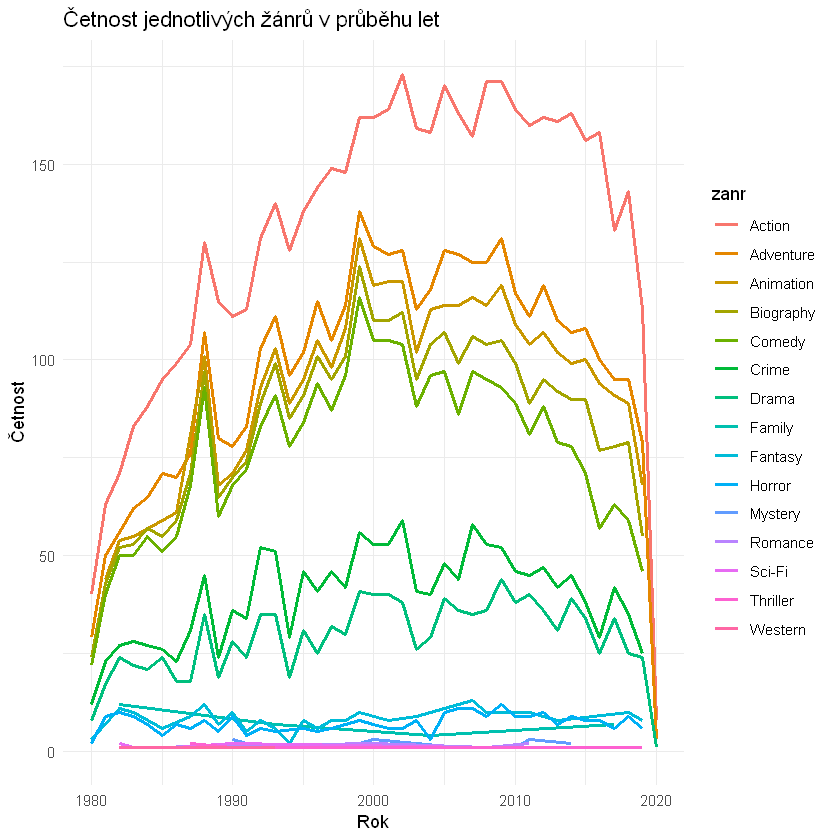

In [211]:
# Jaké je zastoupení žánrů v průběhu let?

ggplot(f, aes(x = rok, group = zanr, color = zanr)) +
  stat_count(aes(y = after_stat(count)), geom = "line", size = 1) +
  labs(title = "Četnost jednotlivých žánrů v průběhu let", 
       x = "Rok", y = "Četnost") +
  theme_minimal() +
  theme(legend.position = "right")

In [ ]:
Akční filmy jakožto jednoduchá, avšak vděčná zábava stabilně vedou v popularitě a to s výrazným náskokem.

- Druhou nejčastější skupinou žánrů jsou dobrodružné, animované, biografické a komediální filmy. 
  U této skupiny je cca. od roku 2012 výrazný pokles, zejména u komedií.

- Třetí skupinou jsou dramata a rodinné filmy.

- Romantických, sci-fi, thriller a westernových filmů vychází překvapivě málo, avšak nevykazují výrazný pokles.

Z grafu je dále zřejmé, že data za poslední dva roky (2019 a 2020) nejsou kompletní. Dale se jich zbavíme.

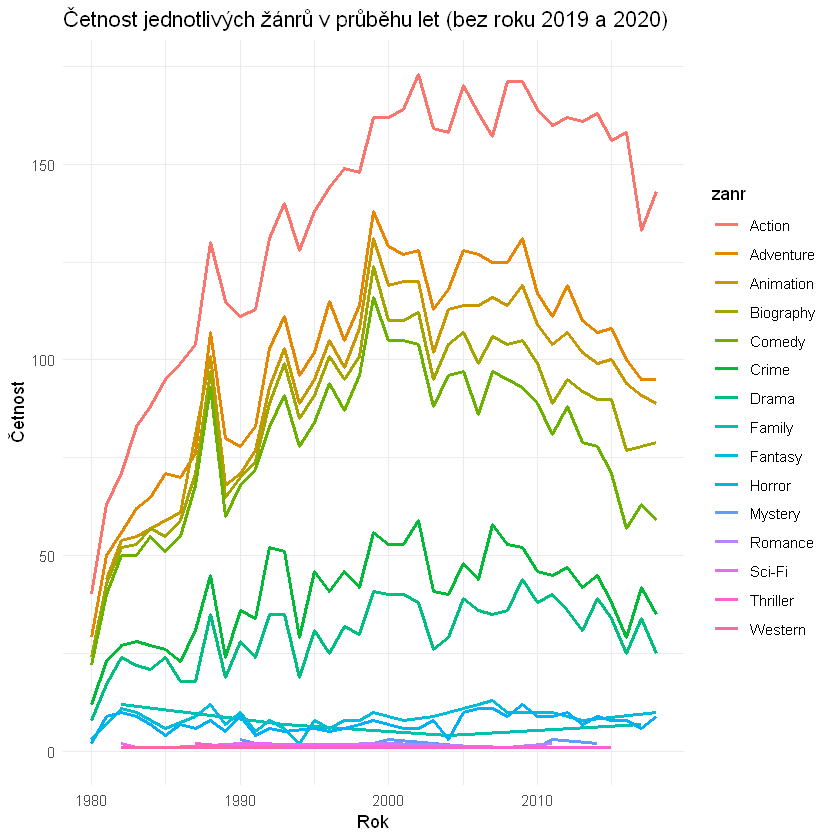

In [210]:
# Ignorujeme roky 2019 a 2020

ggplot(f %>% filter(!rok %in% c(2019, 2020)), aes(x = rok, group = zanr, color = zanr)) +
  stat_count(aes(y = after_stat(count)), geom = "line", size = 1) +
  labs(title = "Četnost jednotlivých žánrů v průběhu let (bez roku 2019 a 2020)", 
       x = "Rok", y = "Četnost") +
  theme_minimal() +
  theme(legend.position = "right")

In [10]:
model <- lm((trzby/1000) ~ rok + skore + delka, data = f)
summary(model)


Call:
lm(formula = (trzby/1000) ~ rok + skore + delka, data = f)

Residuals:
    Min      1Q  Median      3Q     Max 
-429309  -86951  -27588   27828 2562817 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9240387.1   445111.3 -20.760   <2e-16 ***
rok             4476.4      222.9  20.085   <2e-16 ***
skore          23947.4     2673.2   8.958   <2e-16 ***
delka           2129.0      142.2  14.968   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 172400 on 5417 degrees of freedom
Multiple R-squared:  0.1533,	Adjusted R-squared:  0.1528 
F-statistic: 326.9 on 3 and 5417 DF,  p-value: < 2.2e-16


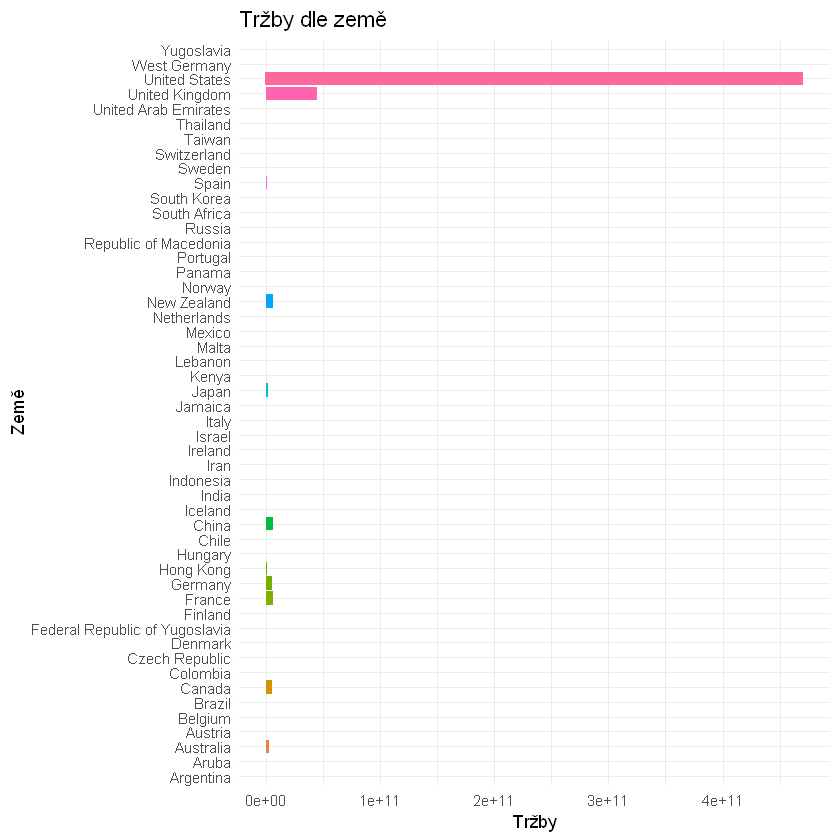

In [12]:
# Jak vypadá abolutní produkce filmů dle států?

library(ggplot2)

ggplot(f, aes(x = zeme, y = trzby, fill = zeme)) +
  geom_bar(stat = "identity") +
  labs(title = "Tržby dle země", x = "Země", y = "Tržby") +
  theme_minimal() +
  theme(legend.position = "none") +
  coord_flip()

Je zřejmé, že budeme potřebovat filtrování, ideálně i jiný typ grafu.

In [213]:
# Nyní vykreslíme celkové tržby zemí pomocí interaktivního koláčového grafu

library(highcharter)

# Příprava dat pro graf
data <- f %>%
  group_by(zeme) %>%
  summarise(trzby = sum(trzby))

# Interaktivní koláčový graf
highchart() %>%
  hc_chart(type = "pie") %>%
  hc_title(text = "Tržby podle zemí (1980-2020)") %>%
  hc_add_series(data, "pie", hcaes(y = trzby, name = zeme)) %>%
  hc_legend(align = "right", verticalAlign = "middle", layout = "vertical")

HTML widgets cannot be represented in plain text (need html)

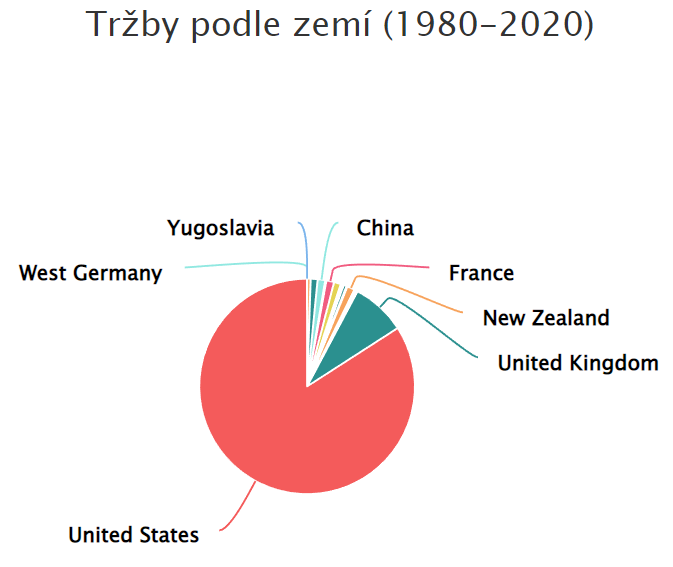

In [ ]:
# Odfiltrujeme od roku 2010

data <- f %>%
  filter(rok >= 2010) %>%
  count(zeme)

# Interaktivní koláčový graf
highchart() %>%
  hc_chart(type = "pie") %>%
  hc_title(text = "Produkce filmů od roku 2010 dle zemí") %>%
  hc_add_series(data, "pie", hcaes(y = n, name = zeme))

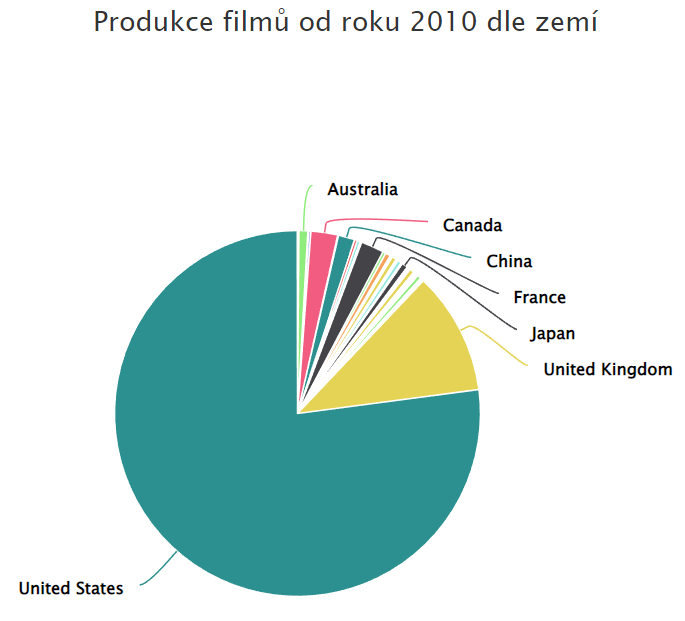

In [ ]:
# Odfiltruji od roku 2010

data <- f %>%
  filter(zeme != "United States" & rok >= 2010) %>%
  count(zeme)

# Interaktivní koláčový graf
highchart() %>%
  hc_chart(type = "pie") %>%
  hc_title(text = "Produkce filmů od roku 2010 dle zemí (mimo USA)") %>%
  hc_add_series(data, "pie", hcaes(y = n, name = zeme))

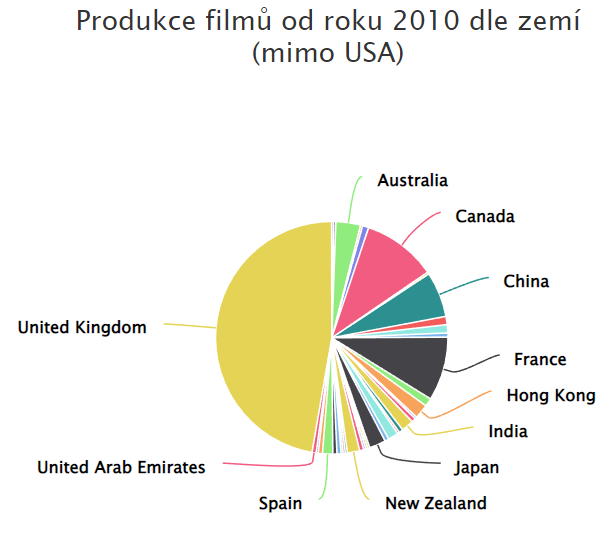

In [29]:
# Filmové tržby dle zemí od roku 2010

od_roku_2010 <- f %>%
  filter(rok >= 2010)

data <- od_roku_2010 %>%
  group_by(zeme) %>%
  summarise(trzby = sum(trzby))

highchart() %>%
  hc_chart(type = "pie") %>%
  hc_title(text = "Tržby dle zemí") %>%
  hc_xAxis(categories = data$zeme) %>%
  hc_yAxis(title = list(text = "Tržby")) %>%
  hc_add_series(data, "pie", hcaes(y = trzby, name = zeme))

HTML widgets cannot be represented in plain text (need html)

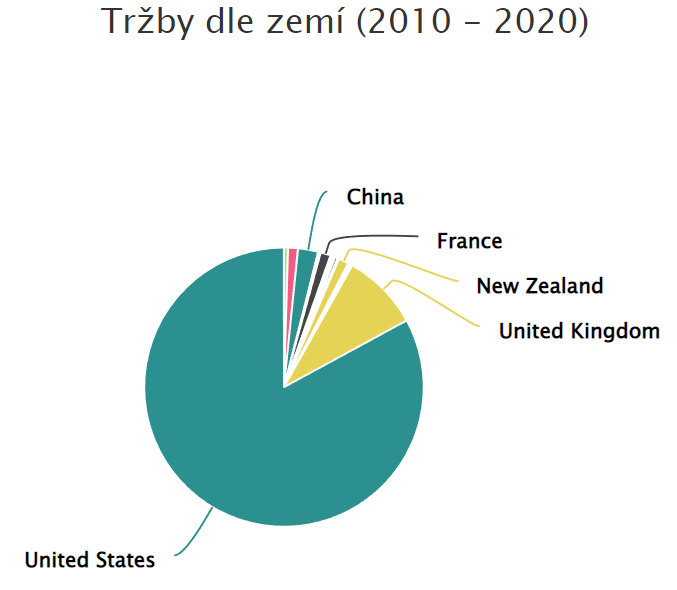

In [215]:
# Jaké žánry nejčastěji produkují jednotlivé země?
library(ggplot2)

# Příprava dat pro graf
f %>%
  group_by(zeme, zanr) %>%
  summarise(pocet = n()) %>%
  top_n(1, pocet) %>%
  arrange(desc(pocet))

`summarise()` has grouped output by 'zeme'. You can override using the `.groups` argument.


zeme,zanr,pocet
<chr>,<chr>,<int>
United States,Comedy,1313
United Kingdom,Action,104
France,Action,31
Canada,Drama,26
Germany,Action,23
Hong Kong,Action,20
China,Action,14
Australia,Action,13
Japan,Animation,13


In [ ]:
Převažují akční filmy. S filtrování od roku 2000 převažují akční filmy i pro USA.

In [47]:
# Žebříček nejvýdělečnějších filmů

top_filmy <- f %>%
  arrange(desc(trzby)) %>%
  head(20)

# Přidání sloupce s pořadím
top_filmy <- top_filmy %>%
  mutate(poradi = row_number())

# Vypiš informace o filmech s nejvyššími tržbami
top_filmy %>%
  select(poradi, nazev, rok, zeme, reziroval, trzby)

poradi,nazev,rok,zeme,reziroval,trzby
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Avatar,2009,United States,James Cameron,2847246203
2,Avengers: Endgame,2019,United States,Anthony Russo,2797501328
3,Titanic,1997,United States,James Cameron,2201647264
4,Star Wars: Episode VII - The Force Awakens,2015,United States,J.J. Abrams,2069521700
5,Avengers: Infinity War,2018,United States,Anthony Russo,2048359754
6,The Lion King,2019,United States,Jon Favreau,1670727580
7,Jurassic World,2015,United States,Colin Trevorrow,1670516444
8,The Avengers,2012,United States,Joss Whedon,1518815515
9,Furious 7,2015,United States,James Wan,1515341399


In [ ]:
James Cameron drží hned dvě místa z top 3 nejvýdělečnějších filmů historie. 

Nutno dodat, že tato analýza nebere v potaz vývoj kupní síly dolaru v jednotlivých letech. 
Tento žebříček tak pravděpodobně znevýhodňuje starší filmy.

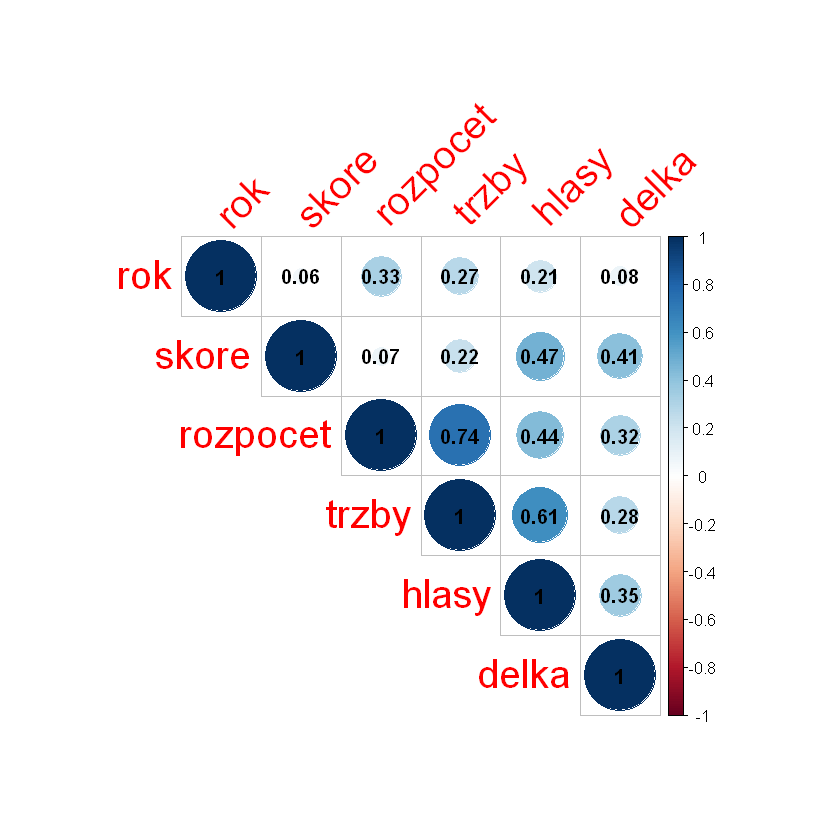

In [69]:
# Vykresleme korelační matici pro sloupce s numerickými hodnotami

library(corrplot)

# Vybrání potřebných sloupců
selected_columns <- f[, c("rok", "skore", "rozpocet", "trzby", "hlasy", "delka")]

# Vytvoření korelační matice
cor_matrix <- cor(selected_columns)

# Vykreslení korelační matice

corrplot(cor_matrix, method = "circle", type = "upper", tl.cex = 2, addCoef.col = "black", tl.srt = 45)

Matice nám říká, že je zde zejména silná souvislost mezi tržbami a rozpočtem a dále tržbami a hodnocením.
Lze také prohlásit, že čím více lidí film hodnotilo, tím lepší je skóre filmu.

In [170]:
# Ze sloupce datum_vydani vyextrahujeme měsíc do nového sloupce

library(tidyverse)
library(lubridate)

f <- f %>%
  mutate(datum_vydani = mdy(str_extract(datum_vydani, "\\w+ \\d+, \\d+")),
         mesic = month(datum_vydani, label = TRUE))

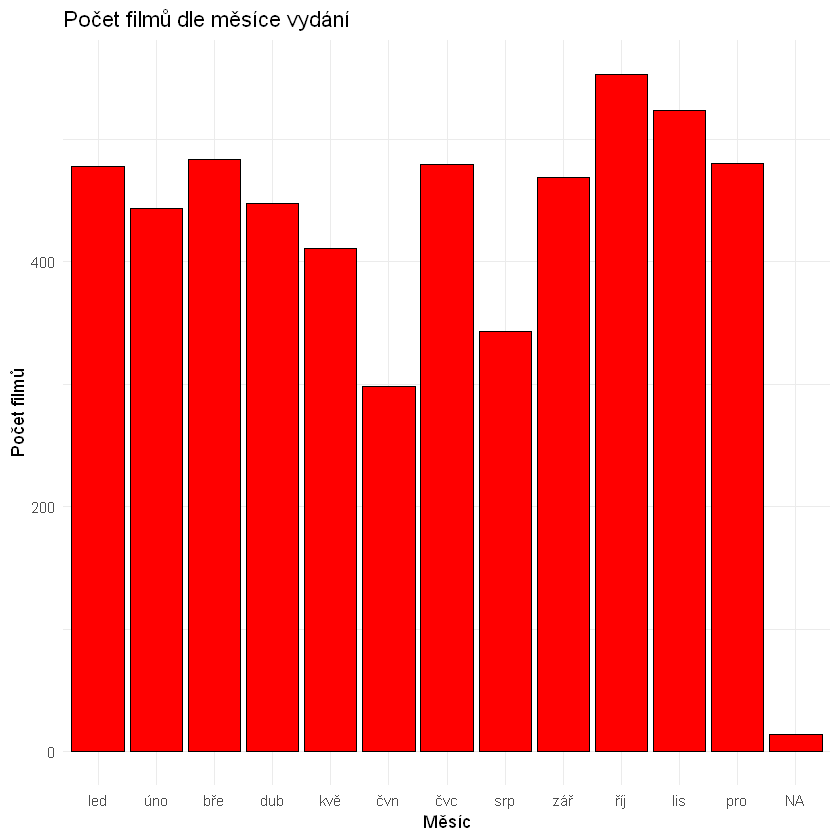

In [172]:
# Ve kterých měsících vychází nejvíce filmů?

f %>%
  group_by(mesic) %>%
  summarise(pocet_filmu = n()) %>%
  ggplot(aes(x = mesic, y = pocet_filmu)) +
  geom_col(fill = "red", color = "black") +
  labs(title = "Počet filmů dle měsíce vydání", x = "Měsíc", y = "Počet filmů") +
  theme_minimal()

Od roku 1980 do 2020 je na filmy nejchudším měsícem červen.
Vidíme, že extrakce měsíců odhlalila chybějící hodnoty 
původně skryté ve sloupci datum_vydani.

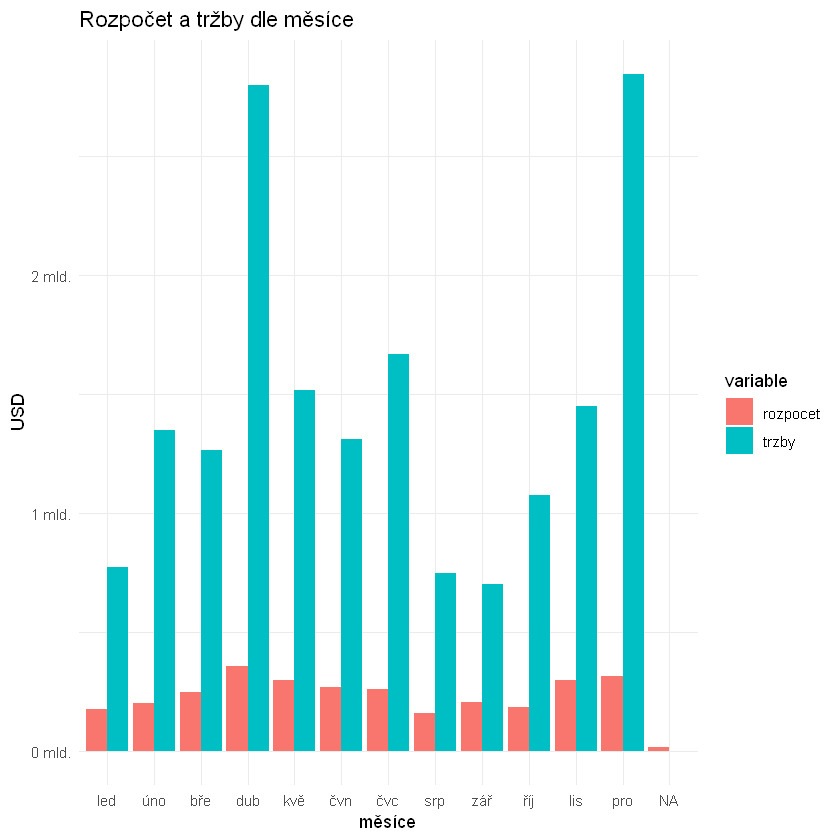

In [164]:
# Vložme do měsíčního grafu více informací, konkrétně poměr rozpočtu a tržeb

library(reshape2)

var <- melt(f[,c('mesic','rozpocet','trzby')],id.vars = 1)

ggplot(var, aes(x = mesic, y = value)) + 
  geom_bar(aes(fill = variable), stat = "identity", position = "dodge") +
  labs(title = "Rozpočet a tržby dle měsíce", x = "měsíce", y = "USD") +
  theme_minimal() +
  scale_y_continuous(labels = function(x) paste0(x/1000000000, " mld."))

Duben a prosinec jsou zdaleka nejvýdělečnější mesíce. Leden, srpen a září naopak nejméně.
Je překvapivé, že graf vypadá jinak v porovnání s předchozími počty filmů dle měsíců.
Z grafu zároveň vidíme, že tržby se vrací 4x a více za daný rozpočet.

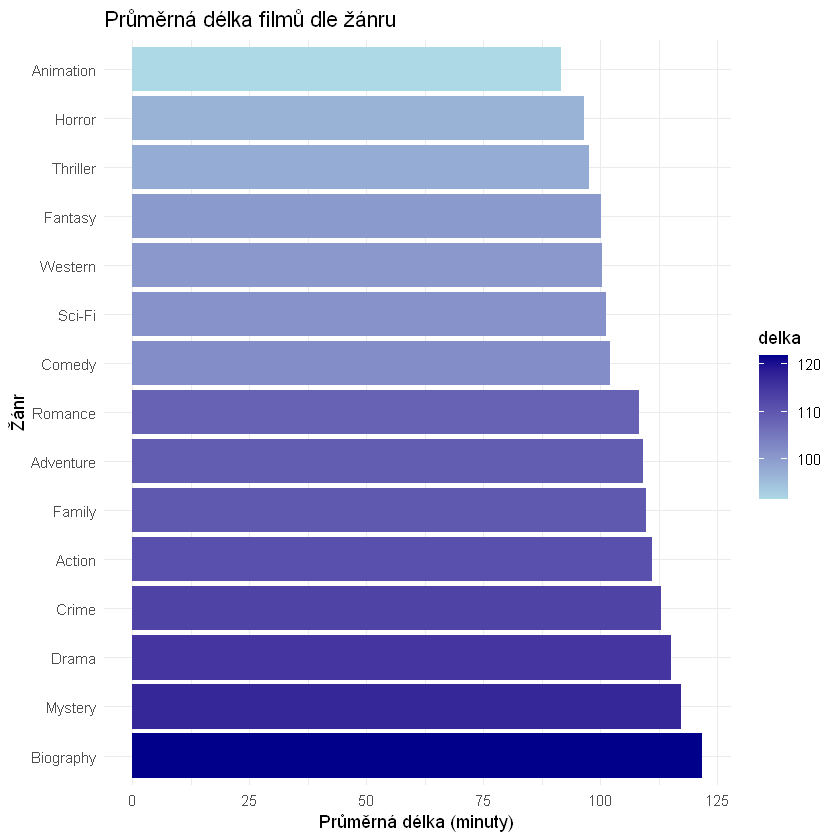

In [177]:
# Které žánry filmů trvají nejdéle?

avg_delka <- aggregate(delka ~ zanr, data = f, FUN = mean)
avg_delka$zanr <- factor(avg_delka$zanr, levels = avg_delka$zanr[order(avg_delka$delka, decreasing = TRUE)])

ggplot(avg_delka, aes(x = zanr, y = delka, fill = delka)) +
  geom_bar(stat = "identity") +
  labs(title = "Průměrná délka filmů dle žánru", x = "žánr", y = "Průměrná délka (minuty)") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  theme_minimal() +
  coord_flip()

In [ ]:
Diváci biografických filmů jsou zvyklí na dvouhodinové filmy. Zatímco animované filmy, 
snad kvůli náročnosti produkce, mají tendenci být o 20 minut kratší.

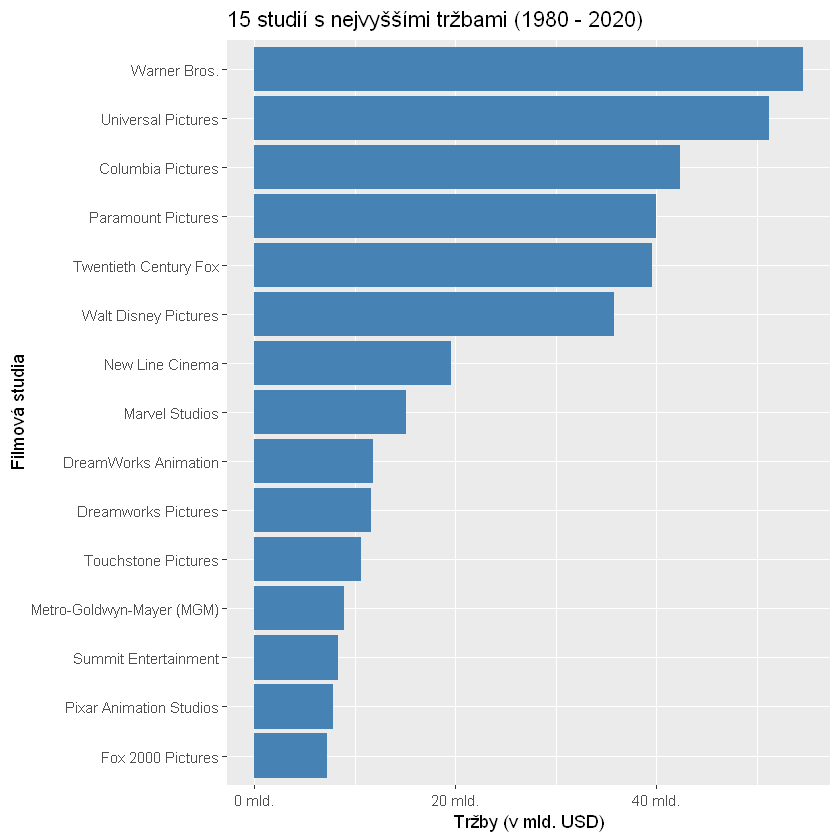

In [216]:
# Která studia nejvíce vydělávají?

top_studios <- f %>%
  group_by(studio) %>%
  summarise(total_revenue = sum(trzby)) %>%
  top_n(15, total_revenue) %>%
  arrange(desc(total_revenue))

ggplot(top_studios, aes(x = reorder(studio, total_revenue), y = total_revenue)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "15 studií s nejvyššími tržbami (1980 - 2020)", x = "Filmová studia", y = "Tržby (v mld. USD)") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
        scale_y_continuous(labels = function(x) paste0(x/1000000000, " mld.")) + 
        coord_flip()

Je zde zřetelná dominance Spojených státu.

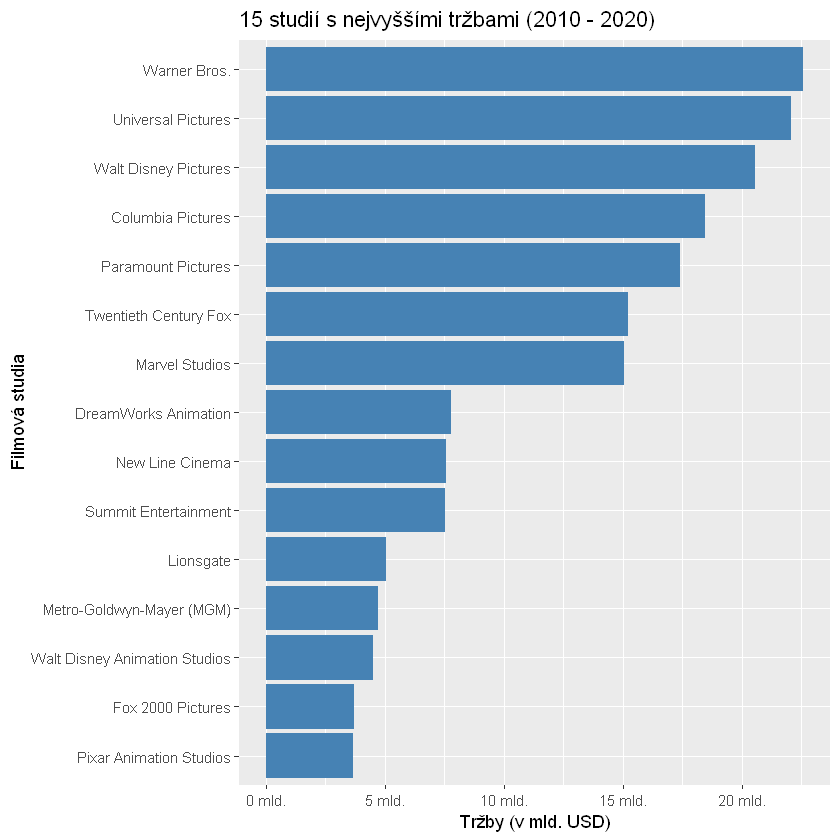

In [217]:
# Která studia jsou nejvýznamnější v posledních deseti letech?

filtered_movies <- f %>%
  filter(rok >= 2010) %>%
  group_by(studio) %>%
  summarise(total_revenue = sum(trzby)) %>%
  top_n(15, total_revenue) %>%
  arrange(desc(total_revenue))

ggplot(filtered_movies, aes(x = reorder(studio, total_revenue), y = total_revenue)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "15 studií s nejvyššími tržbami (2010 - 2020)", x = "Filmová studia", 
       y = "Tržby (v mld. USD)") +
  scale_y_continuous(labels = function(x) paste0(x/1000000000, " mld.")) +
  coord_flip()

Dovednosti naučené v průběhu projektu:

- Doprovodné parametry knihovny ggplot
- Dynamické grafy, ačkoliv nevím, zda je vykreslit v Jupyter Notebooku 
  (byly přidány alespoň jako screenshoty, jinak jsou dostupné přes přiložený Markdown)
- Založen Gihub, Jupyter Notebook ipmb soubor uloen do repozitory
- Repozitory následně publikováno přes NBviewer.

Omezení analýzy:

- Nebyl vzat potaz na kupní sílu amerického dolaru.
- Hodnocení divácké přívětivosti mohlo být odstupňováno.
- Další typy analýz?